## BMW Used car Price prediction using Gradient Boosting, Random Forest, & Decision Tree Regressor

### Quadri Alli

### Goal - Determine the best model that predicts the price for used BMW car prices.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
df = pd.read_csv('bmw_pricing_challenge.csv')
df

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743,110,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600,2018-08-01
4839,BMW,218 Active Tourer,49832,100,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500,2018-08-01
4840,BMW,218 Gran Tourer,19633,110,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000,2018-09-01
4841,BMW,218 Active Tourer,27920,110,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700,2018-09-01


In [48]:
df.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


In [49]:
row = df.loc[4098]
row

maker_key                   BMW
model_key                    X3
mileage                   69362
engine_power                135
registration_date    2013-09-01
fuel                     diesel
paint_color                grey
car_type                    suv
feature_1                  True
feature_2                  True
feature_3                 False
feature_4                  True
feature_5                  True
feature_6                  True
feature_7                  True
feature_8                  True
price                     23600
sold_at              2018-03-01
Name: 4098, dtype: object

In [50]:
df.isna().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [51]:
df.nunique()

maker_key               1
model_key              75
mileage              4786
engine_power           61
registration_date     199
fuel                    4
paint_color            10
car_type                8
feature_1               2
feature_2               2
feature_3               2
feature_4               2
feature_5               2
feature_6               2
feature_7               2
feature_8               2
price                 437
sold_at                 9
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [53]:
df['registration_date'].min()

'1990-03-01'

<Axes: >

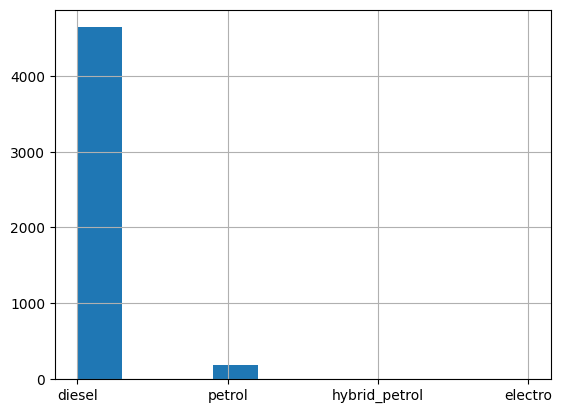

In [54]:
df['fuel'].hist()

## DATA CLEANING

### I will be converting categorical variables into numeric by label encoding strings/bool values into integers for modeling. 

In [55]:
y = df.price

In [56]:
df.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [57]:
df.drop(['maker_key','model_key'],axis=1,inplace=True)
df.head()

,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [58]:
#Fuel first
df['fuel'] = df['fuel'].replace("diesel",1)
df['fuel'] = df['fuel'].replace("petrol",2)
df['fuel'] = df['fuel'].replace("hybrid_petrol",3)
df['fuel'] = df['fuel'].replace("electro",4)

In [59]:
#registration is important in order to understand the age of the car.
df['registration_date'] = [1 if(i>="1990-03-01" and i<"2000-01-01") else 2 if(i>="2000-01-01" and i<"2010-01-01")
                            else 3 for i in df['registration_date']]

In [60]:
#color_type
df['paint_color'] = df['paint_color'].replace("black",1)
df['paint_color'] = df['paint_color'].replace("grey",2)
df['paint_color'] = df['paint_color'].replace("white",3)
df['paint_color'] = df['paint_color'].replace("red",4)
df['paint_color'] = df['paint_color'].replace("silver",5)
df['paint_color'] = df['paint_color'].replace("blue",6)
df['paint_color'] = df['paint_color'].replace("orange",7)
df['paint_color'] = df['paint_color'].replace("beige",8)
df['paint_color'] = df['paint_color'].replace("brown",9)
df['paint_color'] = df['paint_color'].replace("green",10)

In [61]:
# car_type
df['car_type'].unique()
df['car_type'] = df['car_type'].replace("convertible",1)
df['car_type'] = df['car_type'].replace("coupe",2)
df['car_type'] = df['car_type'].replace("estate",3)
df['car_type'] = df['car_type'].replace("hatchback",4)
df['car_type'] = df['car_type'].replace("sedan",5)
df['car_type'] = df['car_type'].replace("subcompact",6)
df['car_type'] = df['car_type'].replace("suv",7)
df['car_type'] = df['car_type'].replace("van",8)

In [62]:
# featture types
df['feature_1'] = df['feature_1'].replace(True,1)
df['feature_1'] = df['feature_1'].replace(False,0)
df['feature_2'] = df['feature_2'].replace(True,1)
df['feature_2'] = df['feature_2'].replace(False,0)
df['feature_3'] = df['feature_3'].replace(True,1)
df['feature_3'] = df['feature_3'].replace(False,0)
df['feature_4'] = df['feature_4'].replace(True,1)
df['feature_4'] = df['feature_4'].replace(False,0)
df['feature_5'] = df['feature_5'].replace(True,1)
df['feature_5'] = df['feature_5'].replace(False,0)
df['feature_6'] = df['feature_6'].replace(True,1)
df['feature_6'] = df['feature_6'].replace(False,0)
df['feature_7'] = df['feature_7'].replace(True,1)
df['feature_7'] = df['feature_7'].replace(False,0)
df['feature_8'] = df['feature_8'].replace(True,1)
df['feature_8'] = df['feature_8'].replace(False,0)


In [63]:
df['Soldat'] =[1 if(i=="2018-01-01") else 2 if(i=="2018-02-01") else 3 if(i=="2018-03-01")
                 else 4 if(i=="2018-04-01") else 5 if(i=="2018-05-01") else 6 if(i=="2018-06-01")
                 else 7 if(i=="2018-07-01") else 8 if(i=="2018-08-01")
                 else 9 if(i=="2018-09-01") else 0 for i in df['sold_at']]

In [64]:
df.head()

,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,Soldat
0,140411,100,3,1,1,1,1,1,0,0,1,1,1,0,11300,2018-01-01,1
1,13929,317,3,2,2,1,1,1,0,0,0,1,1,1,69700,2018-02-01,2
2,183297,120,3,1,3,1,0,0,0,0,1,0,1,0,10200,2018-02-01,2
3,128035,135,3,1,4,1,1,1,0,0,1,1,1,1,25100,2018-02-01,2
4,97097,160,3,1,5,1,1,1,0,0,0,1,1,1,33400,2018-04-01,4


In [65]:
df_copy = df.copy()
df_copy.drop(['price','sold_at'],axis=1,inplace=True)
df_copy.head()

,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,Soldat
0,140411,100,3,1,1,1,1,1,0,0,1,1,1,0,1
1,13929,317,3,2,2,1,1,1,0,0,0,1,1,1,2
2,183297,120,3,1,3,1,0,0,0,0,1,0,1,0,2
3,128035,135,3,1,4,1,1,1,0,0,1,1,1,1,2
4,97097,160,3,1,5,1,1,1,0,0,0,1,1,1,4


In [66]:
price = df['price']
data_score = []
y = price.values.reshape(-1,1)
X = df_copy
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

In [67]:
y_test.shape

(969, 1)

In [68]:
x_test.head()

,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,Soldat
1621,193231,85,3,1,1,3,0,1,0,0,0,0,1,0,8
4098,69362,135,3,1,2,7,1,1,0,1,1,1,1,1,3
3135,321498,170,2,1,6,5,1,1,1,0,1,1,1,1,5
1861,192063,90,2,1,1,4,0,0,0,0,0,0,1,0,2
1571,164659,100,3,1,3,3,1,1,0,0,0,0,1,0,7


## Predictions

### Random Forest Regressor

In [69]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train,y_train)
preds = model.predict(x_test)
preds

/var/folders/fy/8zdrzg6s257dps6bmys5m3h00000gn/T/ipykernel_18161/4120097865.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


array([ 8501., 20108.,  7121.,  4611.,  9411., 34563., 18727., 46846.,
       31117., 13516., 11918., 11234., 16295., 13626., 33959., 12385.,
        9402., 35440., 13858., 12227., 48582., 13722., 12269., 18095.,
       15000., 12950., 16385., 11971.,  9911., 13523.,  1089.,  8605.,
       15295., 14531., 23155., 14006.,  4602., 10956., 13990., 13150.,
       16645., 12306.,  9518., 20543., 11330., 26172.,  6983., 18899.,
       13209., 31748., 22232., 12078., 17498., 16631., 24329., 23982.,
       15292., 13570., 13256., 19575., 18094., 11492., 37268., 13855.,
       18252., 23544.,  7923., 18048., 11690., 12558., 26235.,  9286.,
       17111., 24030.,  8972.,  8536., 14084., 12643.,  6093., 12384.,
        9932., 13182., 13173., 35208., 13850.,  4155., 11965., 11173.,
       12151., 16069., 10206., 38839., 21401., 16619., 18614., 12965.,
        7974., 14841., 15172., 14207., 13737.,  9774., 12466., 47606.,
       14742.,  8953., 14306., 16491., 17235., 29980., 10489.,  5126.,
      

In [70]:

mae = mean_absolute_error(y_test, preds)
mae

2382.6006191950464

### Accuracy Score (Random Forest)

In [71]:
print(model.score(x_test,y_test))

0.8218254038519528


### Gradient  Boosting Regressor

In [72]:
model_2 = GradientBoostingRegressor(min_samples_leaf= 15, min_samples_split=2, 
                                         learning_rate=0.1, max_depth=4, n_estimators=100)
model_2.fit(x_train, y_train)
pred_ict = model_2.predict(x_test)
pred_ict 

/Users/quadrialli/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 8703.05056792, 27338.00759896,  7890.81311011,  3952.73269448,
       10387.86093833, 29010.89643351, 16533.24323875, 45469.06513013,
       45564.99652535, 11839.18594442, 12748.66774032, 10742.00131574,
       15005.48795535, 14683.50283132, 33961.52280728, 13940.56217383,
        9589.50868994, 34130.48721285, 12675.0736664 , 11726.63058753,
       49875.21989984, 14559.12131481, 12162.56114187, 20043.60604868,
       14823.00027629, 12620.95301457, 14932.80306475, 11067.92592467,
        9978.39619735, 13855.13179602,  2044.32978529,  7832.86995695,
       16314.144202  , 14296.64119703, 21620.27709859, 13268.98067643,
        3756.70254149, 11201.92979637, 12489.65316967, 11452.38029467,
       16950.84260783, 13826.15480419,  9094.30768887, 18636.84583239,
       10641.04385461, 28230.93375178,  7614.10168282, 19655.06825708,
       12120.85923249, 32296.56092642, 22396.54108153, 11919.24224919,
       16342.34555872, 17347.48889894, 24312.69364827, 26420.78205186,
      

In [73]:
gb_mae = mean_absolute_error(y_test, pred_ict)
gb_mae

2494.8064441252136

### Accuracy Score (Gradient Boosting)

In [82]:
print(model_2.score(x_test,y_test))

0.8068978910957284


### Decision Tree Regressor

In [83]:
model_3 = DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
model_3.fit(x_train, y_train)
predict = model_3.predict(x_test)
predict

array([ 9641.58730159, 21158.33333333, 10088.88888889,  4919.23076923,
       11966.86656672, 23161.62790698, 18848.90510949, 41066.66666667,
       18848.90510949, 15113.76811594, 13483.82838284, 11966.86656672,
       17692.46231156, 11966.86656672, 29731.57894737, 12298.34710744,
        9641.58730159, 34543.47826087, 14384.61538462, 11966.86656672,
       41800.        , 11966.86656672, 11966.86656672, 23161.62790698,
       18848.90510949, 13483.82838284, 18848.90510949, 11966.86656672,
        9641.58730159,  9641.58730159,  4919.23076923, 10088.88888889,
       17889.        , 14735.35353535, 26762.96296296, 11966.86656672,
        4919.23076923, 12298.34710744, 11966.86656672, 15096.80851064,
       17296.19047619,  9641.58730159, 11966.86656672, 21392.85714286,
       11966.86656672, 29731.57894737,  4919.23076923, 18300.        ,
       11966.86656672, 29731.57894737, 20324.29906542, 11966.86656672,
       18848.90510949, 11966.86656672, 23161.62790698, 18848.90510949,
      

In [84]:
dt_mae = mean_absolute_error(y_test, predict)
dt_mae

3010.0557310925565

### Accuracy Score (Decision Tree Regressor)

In [85]:
print(model_3.score(x_test,y_test))

0.7396614991461787


## Conclusion

### We can see that we achieved a of price prediction score of approximately 82% & 81% for both Random Forest and Gradient Boosting respectively. However, after many parameters tuning, Random forest seems to have the best predictions by a slight advantage. 